### **Assignment 3**

Downlaod Dataset

In [1]:
!unzip /content/drive/MyDrive/DataSets/Flowers-Dataset.zip

Image Augmentation

In [2]:
pip install --upgrade tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 18 kB/s 
     |████████████████████████████████| 1.7 MB 42.0 MB/s 
     |████████████████████████████████| 438 kB 69.3 MB/s 
     |████████████████████████████████| 5.9 MB 41.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5

In [3]:
pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dg=ImageDataGenerator( rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

test_dg=ImageDataGenerator( rescale=1./255)

x_train=train_dg.flow_from_directory(r"/content/drive/MyDrive/DataSets/Flowers-Dataset/train",target_size=(64,64),class_mode="categorical",batch_size=24)
x_test=test_dg.flow_from_directory(r"/content/drive/MyDrive/DataSets/Flowers-Dataset/test",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 3500 images belonging to 5 classes.
Found 292 images belonging to 5 classes.


In [6]:
x_train.class_indices
x_test.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

Create Model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPool2D,Flatten,Dropout

model=Sequential()

Add Layers (Convolution,MaxPooling,Flatten,Dense(Hidden
Layers),Output)

In [8]:
model.add(Convolution2D(32,(3,3),activation="relu",strides=(1,1),input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

In [9]:
model.add(Dense(300,activation="relu"))
model.add(Dropout(0.6, noise_shape = None, seed = None))
model.add(Dense(200,activation="relu"))
model.add(Dropout(0.6, noise_shape = None, seed = None))

In [10]:
model.add(Dense(5,activation="softmax")) #The output has only 5 categories

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                        

Compile The Model

In [12]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

Fit The Model

In [41]:
model.fit(x_train,epochs=20,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test)//2)

Epoch 1/20
146/146 [==============================] - 40s 273ms/step - loss: 0.8129 - accuracy: 0.7017 - val_loss: 0.8824 - val_accuracy: 0.6875
Epoch 2/20
146/146 [==============================] - 39s 267ms/step - loss: 0.7976 - accuracy: 0.7020 - val_loss: 1.0245 - val_accuracy: 0.6528
Epoch 3/20
146/146 [==============================] - 39s 269ms/step - loss: 0.8148 - accuracy: 0.6871 - val_loss: 0.9790 - val_accuracy: 0.7014
Epoch 4/20
146/146 [==============================] - 39s 266ms/step - loss: 0.7825 - accuracy: 0.7077 - val_loss: 0.8909 - val_accuracy: 0.6875
Epoch 5/20
146/146 [==============================] - 39s 264ms/step - loss: 0.7695 - accuracy: 0.7071 - val_loss: 0.9555 - val_accuracy: 0.6875
Epoch 6/20
146/146 [==============================] - 39s 264ms/step - loss: 0.7591 - accuracy: 0.7186 - val_loss: 1.0189 - val_accuracy: 0.6736
Epoch 7/20
146/146 [==============================] - 38s 263ms/step - loss: 0.7491 - accuracy: 0.7177 - val_loss: 0.6867 - val_ac

Save The Model

In [43]:
model.save('/content/drive/MyDrive/DataSets/Flower.h5')

Test The Model

In [44]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [45]:
model=load_model('/content/drive/MyDrive/DataSets/Flower.h5')

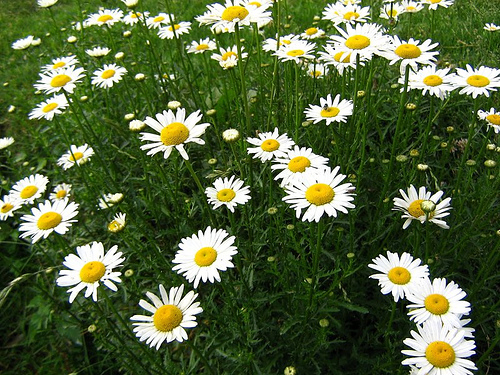

In [58]:
img=image.load_img(r"/content/drive/MyDrive/DataSets/Flowers-Dataset/test/daisy/169371301_d9b91a2a42.jpg")
img

In [59]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x.shape


(1, 375, 500, 3)

In [60]:
import cv2
img = cv2.imread('/content/drive/MyDrive/DataSets/Flowers-Dataset/test/daisy/169371301_d9b91a2a42.jpg')
img = cv2.resize(img,(64,64),3)

img=np.expand_dims(img,axis=0)


In [61]:
pred=model.predict(img)
pred

1/1 [==============================] - 0s 30ms/step


array([[1., 0., 0., 0., 0.]], dtype=float32)

In [56]:
x_test.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [62]:
index=['daisy','dandelion','rose','sunflower','tulip']
index[np.argmax(pred)]


'daisy'